In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np # obliczenia numeryczne


In [2]:
filename1 = "restaurant-menus.csv"
filename2 = "restaurants.csv"

file_path1 = os.path.join(os.path.abspath(""), filename1)

file_path2 = os.path.join(os.path.abspath(""), filename2)

menus = pd.read_csv(file_path1)
restaurants = pd.read_csv(file_path2)

In [3]:
restaurants

id  position                                            name  score  \
0          1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1          2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2          3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3          4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4          5       162                Nelson Brothers Cafe (17th St N)    4.7   
...      ...       ...                                             ...    ...   
40222  40223        54     Mangia la pasta! (5610 N Interstate Hwy 35)    4.8   
40223  40224        53                   Wholly Cow Burgers  (S Lamar)    4.6   
40224  40225        52                                 EurAsia Ramen 3    4.7   
40225  40226        51                        Austin's Habibi (5th St)    4.7   
40226  40227        50                                     Beijing Wok    4.4   

       ratings                                           category price_range  \
0          NaN                      Burgers, American, Sandwiches           $   
1          NaN   Coffee and Tea, Breakfast and Brunch, Bubble Tea         NaN   
2          NaN         American, Cheesesteak, Sandwiches, Alcohol           $   
3          NaN                                              Pizza           $   
4         22.0          Breakfast and Brunch, Burgers, Sandwiches         NaN   
...        ...                                                ...         ...   
40222    500.0       Pasta, Comfort Food, Italian, Group Friendly           $   
40223    245.0  American, Burgers, Breakfast and Brunch, Aller...           $   
40224    293.0  Sushi, Asian, Japanese, Exclusive to Eats, Gro...           $   
40225    208.0  Mediterranean, Gluten Free Friendly, Allergy F...          $$   
40226    254.0  Chinese, Asian, Asian Fusion, Family Friendly,...           $   

                                            full_address zip_code        lat  \
0          224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1      1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2              541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3             1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   
4                   314 17th St N, Birmingham, AL, 35203    35203  33.514730   
...                                                  ...      ...        ...   
40222                      5610 N I35, Austin, TX, 78751    78751  30.316248   
40223               3010 S Lamar Blvd, Austin, TX, 78704    78704  30.242816   
40224                5222 Burnet Road, Austin, TX, 78756    78756  30.324290   
40225                    817 W 5th St, Austin, TX, 78703    78703  30.269580   
40226                  8106 Brodie Ln, Austin, TX, 78749    78749  30.202210   

             lng  
0     -86.830703  
1     -86.773330  
2     -86.854640  
3     -86.806614  
4     -86.811700  
...          ...  
40222 -97.708441  
40223 -97.783821  
40224 -97.740200  
40225 -97.753110  
40226 -97.838689  

[40227 rows x 11 columns]

In [3]:
#I'm creating new data_frame. I need only columns: "id", "position", "lat", "lng"
geo_restaurant = restaurants.drop(['full_address', 'zip_code', 'name', 'score', 'ratings', 'category', 'price_range'], axis=1)
geo_restaurant

id  position        lat        lng
0          1        19  33.562365 -86.830703
1          2         9  33.583640 -86.773330
2          3         6  33.509800 -86.854640
3          4        17  33.404439 -86.806614
4          5       162  33.514730 -86.811700
...      ...       ...        ...        ...
40222  40223        54  30.316248 -97.708441
40223  40224        53  30.242816 -97.783821
40224  40225        52  30.324290 -97.740200
40225  40226        51  30.269580 -97.753110
40226  40227        50  30.202210 -97.838689

[40227 rows x 4 columns]

In [5]:
#I'm sorting data to to see if there are several restaurants with this different position
geo_restaurant.sort_values("position", ascending=True, inplace=False, ignore_index=False)

id  position        lat         lng
16404  16405         1  46.733090 -117.028120
37499  37500         1  32.541780  -94.748820
13573  13574         1  47.096640 -120.678890
13572  13573         1  46.999860 -120.548666
16537  16538         1  47.720030 -117.410780
...      ...       ...        ...         ...
39460  39461       300  30.273938  -97.744745
10954  10955       300  45.562880 -122.680900
39463  39464       300  30.418233  -97.702144
7699    7700       300  47.661601 -122.332036
18400  18401       300  38.872067  -77.261206

[40227 rows x 4 columns]

In [6]:
#I'm creating a map of the United States.
#The colors indicate the position of the restaurant

fig = go.Figure(data=go.Scattergeo(
        lon = geo_restaurant['lng'],
        lat = geo_restaurant['lat'],
        mode = 'markers',
        marker = dict(
            size = 5,
            opacity = 0.3,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            colorscale = "blues",
            cmin = geo_restaurant['position'].max(),
        color = geo_restaurant['position'],
        cmax = geo_restaurant['position'].min(),
            colorbar_title="Position"
        )))

fig.update_layout(
        title = 'Position of restaurants',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()


In [5]:
#For the analysis of subsequent columns, I need to remove all NaN values
no_nan = restaurants.drop(['full_address', 'category','price_range'], axis=1)

In [6]:
no_nan = no_nan.dropna()
no_nan

id  position                                         name  score  \
4          5       162             Nelson Brothers Cafe (17th St N)    4.7   
6          7        27                                 Jinsei Sushi    4.7   
13        14        51                 Panera (521 Fieldstown Road)    4.6   
15        16        88     Jeni's Splendid Ice Cream (Pepper Place)    5.0   
18        19        30                                 Falafel Cafe    4.9   
...      ...       ...                                          ...    ...   
40222  40223        54  Mangia la pasta! (5610 N Interstate Hwy 35)    4.8   
40223  40224        53                Wholly Cow Burgers  (S Lamar)    4.6   
40224  40225        52                              EurAsia Ramen 3    4.7   
40225  40226        51                     Austin's Habibi (5th St)    4.7   
40226  40227        50                                  Beijing Wok    4.4   

       ratings zip_code        lat        lng  
4         22.0    35203  33.514730 -86.811700  
6         63.0    35209  33.480440 -86.790440  
13        44.0    35071  33.651407 -86.819247  
15        20.0    35233  33.516600 -86.789950  
18        48.0    35233  33.508353 -86.803170  
...        ...      ...        ...        ...  
40222    500.0    78751  30.316248 -97.708441  
40223    245.0    78704  30.242816 -97.783821  
40224    293.0    78756  30.324290 -97.740200  
40225    208.0    78703  30.269580 -97.753110  
40226    254.0    78749  30.202210 -97.838689  

[22142 rows x 8 columns]

In [7]:
#I'm analysing correlations between position  score and ratings
#Fist i'm cheking a linear correlation 
no_nan.corr('pearson').iloc[1:-2, 1:-2]


position     score   ratings
position   1.00000  0.087610  0.018280
score      0.08761  1.000000  0.173766
ratings    0.01828  0.173766  1.000000

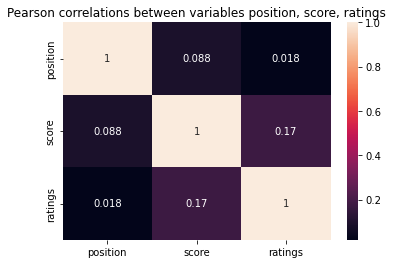

In [8]:
sns.heatmap(no_nan.corr('pearson').iloc[1:-2, 1:-2], annot=True)
plt.title("Pearson correlations between variables position, score, ratings")
plt.show()

In [9]:
#Next I'm cheking Spearman correlations
no_nan.corr('spearman')


id  position     score   ratings       lat       lng
id        1.000000  0.129780 -0.018780  0.045759 -0.705985  0.217866
position  0.129780  1.000000  0.111761  0.006434 -0.007017 -0.028235
score    -0.018780  0.111761  1.000000  0.149701  0.074527 -0.002444
ratings   0.045759  0.006434  0.149701  1.000000 -0.010335  0.042708
lat      -0.705985 -0.007017  0.074527 -0.010335  1.000000 -0.531921
lng       0.217866 -0.028235 -0.002444  0.042708 -0.531921  1.000000

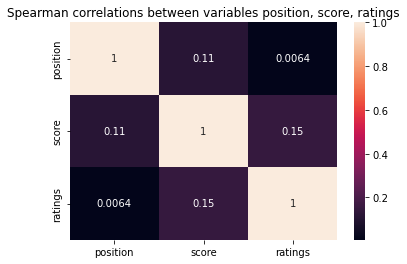

In [10]:
sns.heatmap(no_nan.corr('spearman').iloc[1:-2, 1:-2], annot=True)
plt.title("Spearman correlations between variables position, score, ratings")
plt.show()

In [11]:
no_nan.corr('kendall')

id  position     score   ratings       lat       lng
id        1.000000  0.085317 -0.013570  0.030920 -0.477641  0.129445
position  0.085317  1.000000  0.079363  0.004276 -0.005475 -0.019454
score    -0.013570  0.079363  1.000000  0.109319  0.052671 -0.001881
ratings   0.030920  0.004276  0.109319  1.000000 -0.006581  0.027661
lat      -0.477641 -0.005475  0.052671 -0.006581  1.000000 -0.303682
lng       0.129445 -0.019454 -0.001881  0.027661 -0.303682  1.000000

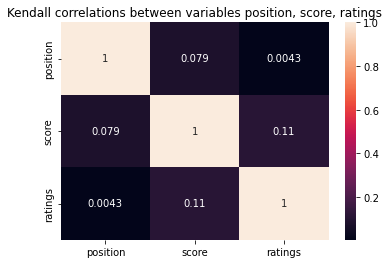

In [12]:
sns.heatmap(no_nan.corr('kendall').iloc[1:-2, 1:-2], annot=True)
plt.title("Kendall correlations between variables position, score, ratings")
plt.show()

In [7]:
#Now i want find a top 20 of restaurants. 
#First I'looking for restaurant with the greatest number of ratings, next I'm looking at the greatest score and position 

top20 = no_nan.sort_values(['ratings', 'score'], ascending=False, inplace=False, ignore_index=True).head(20)
top20

id  position                                               name  score  \
0   18969       102                          Bethesda Bagels (Rosslyn)    4.9   
1   19376       110                                      Grazie Grazie    4.9   
2   19414       283                        Prescription Chicken (D.C.)    4.9   
3   19517       125                    Cracked Eggery (Cleveland Park)    4.9   
4   19523       113  Isshin Asian Bistro (Originally Wok and Roll 1...    4.9   
5   19731       134                             Poke It Up - Arlington    4.9   
6   19735       129                   Poki DC &amp; Gong Cha (14th St)    4.9   
7   19952        58                          Taco Bamba (Falls Church)    4.9   
8   19965        47             Hamilton Liquors (5205 Georgia Ave NW)    4.9   
9   20326        36                               Umi Japanese Cuisine    4.9   
10  20451       180                              sweetgreen (Old Town)    4.9   
11  26575       193                 Five Guys VA-0084 2300 Wilson Blvd    4.9   
12  28634       170                               Indigo (K Street NE)    4.9   
13  28693        14                   Filomena Ristorante (Georgetown)    4.9   
14  28790       114                                 CIRCA at Navy Yard    4.9   
15  28982       170                   Chicken + Whiskey (Logan Circle)    4.9   
16  28996       148                                        Bandit Taco    4.9   
17  32779         8                                            Jetson🛒    4.9   
18  18313        31                           Taco Bamba (Springfield)    4.8   
19  19026       113                             Taco Bamba (Arlington)    4.8   

    ratings zip_code        lat        lng  
0     500.0    22209  38.896494 -77.071272  
1     500.0    20024  38.879802 -77.025330  
2     500.0    20001  38.914800 -77.021720  
3     500.0    20008  38.934731 -77.058372  
4     500.0    20009  38.921230 -77.042500  
5     500.0    22201  38.882326 -77.114002  
6     500.0    20005  38.899937 -77.031710  
7     500.0    22043  38.901970 -77.205520  
8     500.0    20011  38.953170 -77.027290  
9     500.0    20008  38.924291 -77.051522  
10    500.0    22314  38.805571 -77.049001  
11    500.0    22201  38.890687 -77.087393  
12    500.0    20002  38.902260 -77.002220  
13    500.0    20007  38.904398 -77.062519  
14    500.0    20003  38.876353 -77.006122  
15    500.0    20009  38.913873 -77.032373  
16    500.0    20009  38.916716 -77.037178  
17    500.0    00918  18.429709 -66.072322  
18    500.0    22150  38.773030 -77.183680  
19    500.0    22203  38.879740 -77.107610

In [8]:
top20.sort_values(['position'], ascending=True)

id  position                                               name  score  \
17  32779         8                                            Jetson🛒    4.9   
13  28693        14                   Filomena Ristorante (Georgetown)    4.9   
18  18313        31                           Taco Bamba (Springfield)    4.8   
9   20326        36                               Umi Japanese Cuisine    4.9   
8   19965        47             Hamilton Liquors (5205 Georgia Ave NW)    4.9   
7   19952        58                          Taco Bamba (Falls Church)    4.9   
0   18969       102                          Bethesda Bagels (Rosslyn)    4.9   
1   19376       110                                      Grazie Grazie    4.9   
4   19523       113  Isshin Asian Bistro (Originally Wok and Roll 1...    4.9   
19  19026       113                             Taco Bamba (Arlington)    4.8   
14  28790       114                                 CIRCA at Navy Yard    4.9   
3   19517       125                    Cracked Eggery (Cleveland Park)    4.9   
6   19735       129                   Poki DC &amp; Gong Cha (14th St)    4.9   
5   19731       134                             Poke It Up - Arlington    4.9   
16  28996       148                                        Bandit Taco    4.9   
12  28634       170                               Indigo (K Street NE)    4.9   
15  28982       170                   Chicken + Whiskey (Logan Circle)    4.9   
10  20451       180                              sweetgreen (Old Town)    4.9   
11  26575       193                 Five Guys VA-0084 2300 Wilson Blvd    4.9   
2   19414       283                        Prescription Chicken (D.C.)    4.9   

    ratings zip_code        lat        lng  
17    500.0    00918  18.429709 -66.072322  
13    500.0    20007  38.904398 -77.062519  
18    500.0    22150  38.773030 -77.183680  
9     500.0    20008  38.924291 -77.051522  
8     500.0    20011  38.953170 -77.027290  
7     500.0    22043  38.901970 -77.205520  
0     500.0    22209  38.896494 -77.071272  
1     500.0    20024  38.879802 -77.025330  
4     500.0    20009  38.921230 -77.042500  
19    500.0    22203  38.879740 -77.107610  
14    500.0    20003  38.876353 -77.006122  
3     500.0    20008  38.934731 -77.058372  
6     500.0    20005  38.899937 -77.031710  
5     500.0    22201  38.882326 -77.114002  
16    500.0    20009  38.916716 -77.037178  
12    500.0    20002  38.902260 -77.002220  
15    500.0    20009  38.913873 -77.032373  
10    500.0    22314  38.805571 -77.049001  
11    500.0    22201  38.890687 -77.087393  
2     500.0    20001  38.914800 -77.021720

In [26]:
#I'm creating a map with top 20 restaurants 

fig = go.Figure(data=go.Scattergeo(
        lon = top20['lng'],
        lat = top20['lat'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 1,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            colorscale = 'Blues',
            cmin = geo_restaurant['position'].max(),
        color = geo_restaurant['position'],
        cmax = geo_restaurant['position'].min(),
            colorbar_title="Position"
        )))

fig.update_layout(
        title = 'Top 20 restaurants',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

In [ ]:
#Now I want to add a new column with name of state where the restaurant is located. 
# For this i will use a Nominatim from geopy.geocoders

In [9]:
top20_c = top20.copy() # I'm creating a copy of data frame

In [12]:
!pip install geopy 

In [10]:
from geopy.geocoders import Nominatim

In [11]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [12]:
state = top20_c.apply(lambda x:geolocator.reverse(f"{x['lat']},{x['lng']}").raw['address'].get('state', ''), axis=1) # I'm using a function that matches state name by latitude and longitude

In [13]:
state = state.to_frame(name='state') # I must change series to data frame 

In [14]:
poloczony = pd.merge(top20, state, left_index=True, right_index=True) #I'm merging 2 dataframes

In [15]:
poloczony.sort_values(['position'], ascending=True)

id  position                                               name  score  \
17  32779         8                                            Jetson🛒    4.9   
13  28693        14                   Filomena Ristorante (Georgetown)    4.9   
18  18313        31                           Taco Bamba (Springfield)    4.8   
9   20326        36                               Umi Japanese Cuisine    4.9   
8   19965        47             Hamilton Liquors (5205 Georgia Ave NW)    4.9   
7   19952        58                          Taco Bamba (Falls Church)    4.9   
0   18969       102                          Bethesda Bagels (Rosslyn)    4.9   
1   19376       110                                      Grazie Grazie    4.9   
4   19523       113  Isshin Asian Bistro (Originally Wok and Roll 1...    4.9   
19  19026       113                             Taco Bamba (Arlington)    4.8   
14  28790       114                                 CIRCA at Navy Yard    4.9   
3   19517       125                    Cracked Eggery (Cleveland Park)    4.9   
6   19735       129                   Poki DC &amp; Gong Cha (14th St)    4.9   
5   19731       134                             Poke It Up - Arlington    4.9   
16  28996       148                                        Bandit Taco    4.9   
12  28634       170                               Indigo (K Street NE)    4.9   
15  28982       170                   Chicken + Whiskey (Logan Circle)    4.9   
10  20451       180                              sweetgreen (Old Town)    4.9   
11  26575       193                 Five Guys VA-0084 2300 Wilson Blvd    4.9   
2   19414       283                        Prescription Chicken (D.C.)    4.9   

    ratings zip_code        lat        lng                 state  
17    500.0    00918  18.429709 -66.072322           Puerto Rico  
13    500.0    20007  38.904398 -77.062519  District of Columbia  
18    500.0    22150  38.773030 -77.183680              Virginia  
9     500.0    20008  38.924291 -77.051522  District of Columbia  
8     500.0    20011  38.953170 -77.027290  District of Columbia  
7     500.0    22043  38.901970 -77.205520              Virginia  
0     500.0    22209  38.896494 -77.071272              Virginia  
1     500.0    20024  38.879802 -77.025330  District of Columbia  
4     500.0    20009  38.921230 -77.042500  District of Columbia  
19    500.0    22203  38.879740 -77.107610              Virginia  
14    500.0    20003  38.876353 -77.006122  District of Columbia  
3     500.0    20008  38.934731 -77.058372  District of Columbia  
6     500.0    20005  38.899937 -77.031710  District of Columbia  
5     500.0    22201  38.882326 -77.114002              Virginia  
16    500.0    20009  38.916716 -77.037178  District of Columbia  
12    500.0    20002  38.902260 -77.002220  District of Columbia  
15    500.0    20009  38.913873 -77.032373  District of Columbia  
10    500.0    22314  38.805571 -77.049001              Virginia  
11    500.0    22201  38.890687 -77.087393              Virginia  
2     500.0    20001  38.914800 -77.021720  District of Columbia

In [22]:
#I define a function wich change state name to Territory Abbreviations

def skrot_stanu(state):
    if state =='Virginia':
        return 'VA'
    elif state == 'District of Columbia': 
        return 'DC'
    else: return "PRI"

In [23]:
poloczony['state_code'] = poloczony.state.apply(skrot_stanu) # I'm using a create function 
poloczony

id  position                                               name  score  \
0   18969       102                          Bethesda Bagels (Rosslyn)    4.9   
1   19376       110                                      Grazie Grazie    4.9   
2   19414       283                        Prescription Chicken (D.C.)    4.9   
3   19517       125                    Cracked Eggery (Cleveland Park)    4.9   
4   19523       113  Isshin Asian Bistro (Originally Wok and Roll 1...    4.9   
5   19731       134                             Poke It Up - Arlington    4.9   
6   19735       129                   Poki DC &amp; Gong Cha (14th St)    4.9   
7   19952        58                          Taco Bamba (Falls Church)    4.9   
8   19965        47             Hamilton Liquors (5205 Georgia Ave NW)    4.9   
9   20326        36                               Umi Japanese Cuisine    4.9   
10  20451       180                              sweetgreen (Old Town)    4.9   
11  26575       193                 Five Guys VA-0084 2300 Wilson Blvd    4.9   
12  28634       170                               Indigo (K Street NE)    4.9   
13  28693        14                   Filomena Ristorante (Georgetown)    4.9   
14  28790       114                                 CIRCA at Navy Yard    4.9   
15  28982       170                   Chicken + Whiskey (Logan Circle)    4.9   
16  28996       148                                        Bandit Taco    4.9   
17  32779         8                                            Jetson🛒    4.9   
18  18313        31                           Taco Bamba (Springfield)    4.8   
19  19026       113                             Taco Bamba (Arlington)    4.8   

    ratings zip_code        lat        lng                 state state_code  
0     500.0    22209  38.896494 -77.071272              Virginia         VA  
1     500.0    20024  38.879802 -77.025330  District of Columbia         DC  
2     500.0    20001  38.914800 -77.021720  District of Columbia         DC  
3     500.0    20008  38.934731 -77.058372  District of Columbia         DC  
4     500.0    20009  38.921230 -77.042500  District of Columbia         DC  
5     500.0    22201  38.882326 -77.114002              Virginia         VA  
6     500.0    20005  38.899937 -77.031710  District of Columbia         DC  
7     500.0    22043  38.901970 -77.205520              Virginia         VA  
8     500.0    20011  38.953170 -77.027290  District of Columbia         DC  
9     500.0    20008  38.924291 -77.051522  District of Columbia         DC  
10    500.0    22314  38.805571 -77.049001              Virginia         VA  
11    500.0    22201  38.890687 -77.087393              Virginia         VA  
12    500.0    20002  38.902260 -77.002220  District of Columbia         DC  
13    500.0    20007  38.904398 -77.062519  District of Columbia         DC  
14    500.0    20003  38.876353 -77.006122  District of Columbia         DC  
15    500.0    20009  38.913873 -77.032373  District of Columbia         DC  
16    500.0    20009  38.916716 -77.037178  District of Columbia         DC  
17    500.0    00918  18.429709 -66.072322           Puerto Rico        PRI  
18    500.0    22150  38.773030 -77.183680              Virginia         VA  
19    500.0    22203  38.879740 -77.107610              Virginia         VA

In [17]:
mapa = poloczony.groupby(['state'])['id'].count().reset_index() # I want to find a number of restaurants for each state  
mapa.rename(columns={'id':'number_restaurants'}, inplace=True) # I'm changig names of columns 
mapa

state  number_restaurants
0  District of Columbia                  12
1           Puerto Rico                   1
2              Virginia                   7

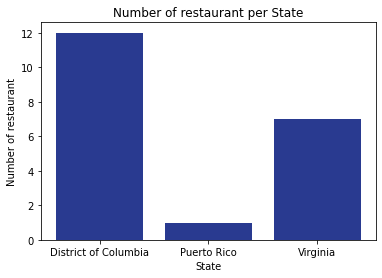

In [27]:
plt.bar(mapa['state'], height=mapa['number_restaurants'], color=(41/255, 58/255, 144/255))
plt.xlabel("State")
plt.ylabel("Number of restaurant")
plt.title('Number of restaurant per State');